Wskaźnik newsów - PKN Orlen
=========================

Notowanie
---------------

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('PKNORLEN','20190520','20190525')    

Analiza Twittów
----------------------

In [2]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'PKNORLEN' : {
                    'search': ['pkn orlen','ropa'] ,
                    'ignore':['uroczystość','ochotniczy','medal','bolid','smaczny','hot dog','medalistka','Lotta','kadet','bieg','sponsor',
                              'Duszyński','Małachowski','Wyciszkiewicz','Kszczot','Lisek','Kubica','Dąbrowskiego',
                              'RobertKubicaKlub','WilliamsRacing','Williams','AkademiiInwestowania'],
                    'sentiment':{
                        'kuluary':-1,
                        'wydać':-1,
                        'przesłuchiwać':-1,
                        'skazić':-1,
                        'brudny':-1,
                        'zanieczyścić':-1,
                        'zakręcić':-1,
                        'kryzys':-1,
                        'zakazić':-1,
                        'lepsza':1,
                        'tańszy':1,
                        'zyskać':1,
                        'konsolidacja':1,
                        'czysty':1,
                        'cud ':1,
                        'plan wznowienia':1,
                        'spadły':1
                        }
                    }
               }

twt = twp.indicator('PKNORLEN','20190520','20190525')
twt_f = list(filter(lambda x: not x.ignore and x.power>200000 and x.sentiment==0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)



    

518967 [] 2019-05-22 19:19:33
-------------------------------------------------------------------------
RT @wjakobik: .@PKN_Orlen nie zakończy negocjacji z Rosjanami dopóki nie zabezpieczy jakości #ropa. W mediach rosyjskich już można znaleźć…
-------------------------------------------------------------------------
RT @ wjakobik : . @ PKN_Orlen Nie zakończyć negocjacje ź Rosjanin dopóki Nie zabezpieczyć jakość # Ropa . W medium rosyjski już możny znaleźć… 
518967 [] 2019-05-23 19:23:14
-------------------------------------------------------------------------
RT @RPEkonomia: Dziś w Warszawie przedstawiciele Transneft przedstawili Polakom i Niemcom plan wznowienia dostaw jakościowej ropy z naftoci…
-------------------------------------------------------------------------
RT @ RPEkonomia : dziś W warszawa przedstawiciel Transneft przedstawić polak i Niemiec plan wznowienie dostawa jakościowy Ropa ź naftoci… 
518967 [] 2019-05-22 18:34:39
--------------------------------------------------

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

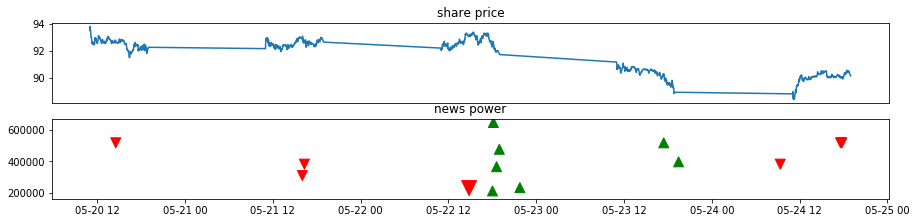

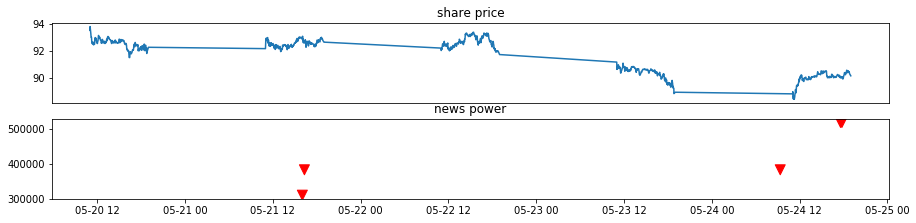

397775 ['cud '] 2019-05-23 19:27:52 krystyna✝️🇵🇱🇪🇺
-------------------------------------------------------------------------
RT @BartekPiekarski: Dochody @PKN_ORLEN w latach 2007-2015 to 5 Miliardów , w 2016-2019 to 19 Miliardów! Cud? Nie! To proste! Wystarczy nie…
233343 ['cud '] 2019-05-22 21:46:26 Maciej K
-------------------------------------------------------------------------
RT @BartekPiekarski: Dochody @PKN_ORLEN w latach 2007-2015 to 5 Miliardów , w 2016-2019 to 19 Miliardów! Cud? Nie! To proste! Wystarczy nie…
477779 ['cud '] 2019-05-22 18:58:12 Panie Adamie
-------------------------------------------------------------------------
RT @BartekPiekarski: Dochody @PKN_ORLEN w latach 2007-2015 to 5 Miliardów , w 2016-2019 to 19 Miliardów! Cud? Nie! To proste! Wystarczy nie…
366587 ['cud '] 2019-05-22 18:35:27 Grażyna
-------------------------------------------------------------------------
RT @BartekPiekarski: Dochody @PKN_ORLEN w latach 2007-2015 to 5 Miliardów , w 2016-2019 to 1

In [16]:
import plot_helper 
twt = list(filter(lambda x: not x.ignore and x.power>200000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt)

twt2 = list(filter(lambda x: '@wjakobik' in x.text or '@BiznesAlert' in x.text ,twt))
plot_helper.plot2(data,twt2)



for t in twt:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)